# Combating Fraud with Machine Learning and Resampling Techniques for Imbalanced Data

#### [Author]: Yassine Sfaihi

# Background of the dataset:

The dataset contains transactions made by European credit cardholders in September 2013. The transactions have been transformed with PCA, with the exception of the 'Time' and 'Amount' features. The 'Class' feature represents whether a transaction is fraudulent (1) or not (0). The dataset is highly imbalanced, with only 0.172% of transactions being fraudulent.

# Problem statement and objective of the project:


The objective of the project is to develop a model that can accurately detect fraudulent credit card transactions. The problem is significant because false positive fraud detections can result in inconvenience for customers, while false negatives can result in monetary losses for the credit card company.

The goal of this project is to detect fraud transactions using machine learning algorithms.
The code includes the implementation of 4 oversampling techniques (SMOTE, ADASYN,
SMOTEENN and ENN) and compares their results on a set of models.

# Data Preparation

In [1]:
import pandas as pd 
import numpy as np


In [2]:
df=pd.read_csv("/home/yassine/Downloads/creditcard.csv")

In [3]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (284807, 31)


In [204]:
# Overview of the data
print("Overview of the data:" )
df.head()

Overview of the data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
175005,122162.0,1.913351,0.379815,-0.878497,3.599326,0.787740,0.909389,-0.049016,0.178154,-0.834806,...,0.084564,0.342333,0.041306,0.182720,0.184600,0.077320,-0.037619,-0.059467,7.56,0
259162,158991.0,-5.079688,-3.085371,-4.053290,0.310538,3.507393,-0.229835,1.526065,-0.691351,1.408176,...,-1.041825,0.990240,1.567415,-1.096102,-1.223628,0.469088,-0.281352,2.649827,160.00,0
96296,65704.0,0.906218,-1.098374,0.825706,0.613545,-1.384232,0.291467,-0.820311,0.284303,-0.504918,...,-0.077426,0.004004,-0.122906,0.181771,0.288475,-0.233871,0.052715,0.045439,158.00,0
181944,125192.0,-1.950316,0.964217,0.159607,-2.142268,0.001737,-0.568556,0.347199,1.015335,-0.371888,...,-0.217610,-1.106515,-0.185501,0.681057,0.536678,0.880489,-0.279808,-0.104760,39.00,0
275457,166542.0,-0.089938,0.511432,0.883198,-0.647320,-0.296266,-0.421553,0.408877,-0.038751,0.519104,...,-0.158415,-0.554058,0.296128,1.117239,-0.927755,0.077088,-0.260669,0.018302,41.93,0


In [7]:
print("Data Types of columns:", df.dtypes)



Data Types of columns: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [8]:
print("Description of the dataset:" )
df.describe()


Description of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Distribution of the target variable

### Plotting the distribution of the target variable using seaborn


In [4]:
# Calculating the class counts and percentage
class_counts = df['Class'].value_counts()
class_counts_percentage = df['Class'].value_counts(normalize=True) * 100

# Printing the class counts and percentage
print("Class counts: \n", class_counts)
print("\nClass counts percentage: \n", class_counts_percentage)


Class counts: 
 0    284315
1       492
Name: Class, dtype: int64

Class counts percentage: 
 0    99.827251
1     0.172749
Name: Class, dtype: float64


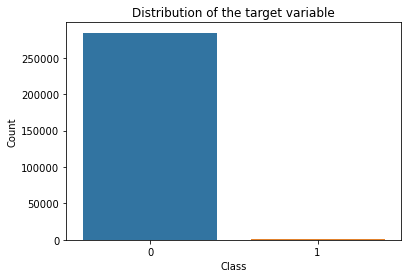

In [11]:
import seaborn as sns

#Plotting the count of each class in the target variable
sns.countplot(x='Class', data=df)

#Adding the title, x-axis label and y-axis label to the plot
plt.title("Distribution of the target variable")
plt.xlabel("Class")
plt.ylabel("Count")

#Displaying the plot
plt.show()

In [143]:
class_counts = df['Class'].value_counts()
print(class_counts)


0    29938
1       62
Name: Class, dtype: int64


The target variable distribution in the dataset is highly imbalanced with majority of the samples belonging to class 0 (not fraudulent) and only a small proportion of samples belonging to class 1 (fraudulent). This is evident from the count of each target class where there are 284315 samples belonging to class 0 and only 492 samples belonging to class 1. This imbalance in the target variable can potentially impact the performance of the machine learning models and thus, needs to be considered while building and evaluating the models.

This code creates a subplot with two plots side by side. The first plot shows the distribution of the amount for class 0 (not fraud) in blue color. The second plot shows the distribution of the amount for class 1 (fraud) in red color. This visual representation helps us understand the distribution of the amount for both classes and helps us identify if there are any significant differences between the two classes. By comparing the two plots, we can potentially identify certain patterns or characteristics that may be indicative of fraudulent transactions.

# Data exploration and visualization 

/home/yassine/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


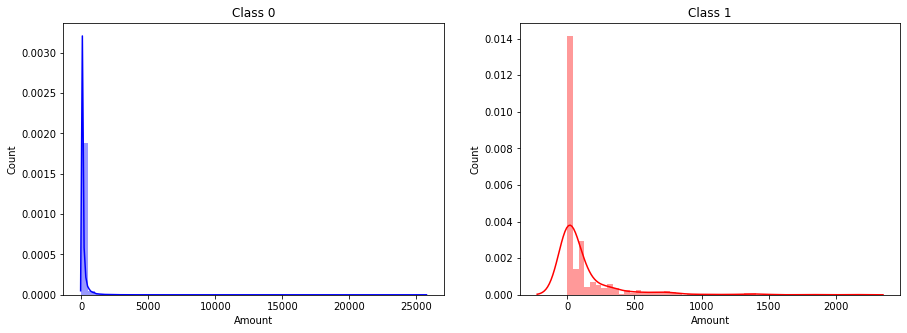

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of amount for class 0
sns.distplot(df[df['Class'] == 0]['Amount'], kde=True, ax=axs[0], color='b')
axs[0].set_title('Class 0')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Count')

# Plot distribution of amount for class 1
sns.distplot(df[df['Class'] == 1]['Amount'], kde=True, ax=axs[1], color='r')
axs[1].set_title('Class 1')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Count')

plt.show()


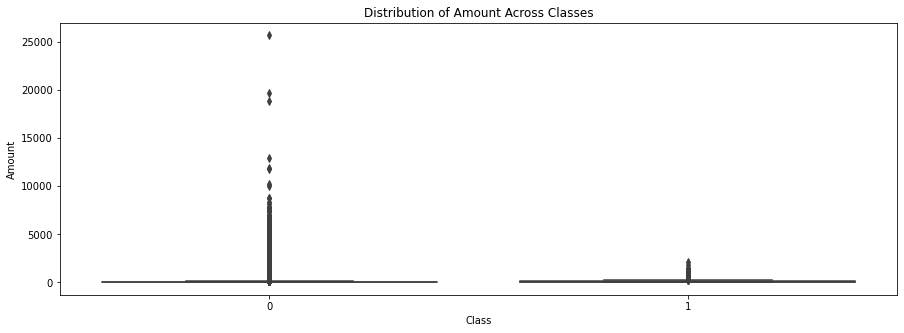

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots to show the distribution of variables across classes
plt.figure(figsize=(15, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Amount Across Classes')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()



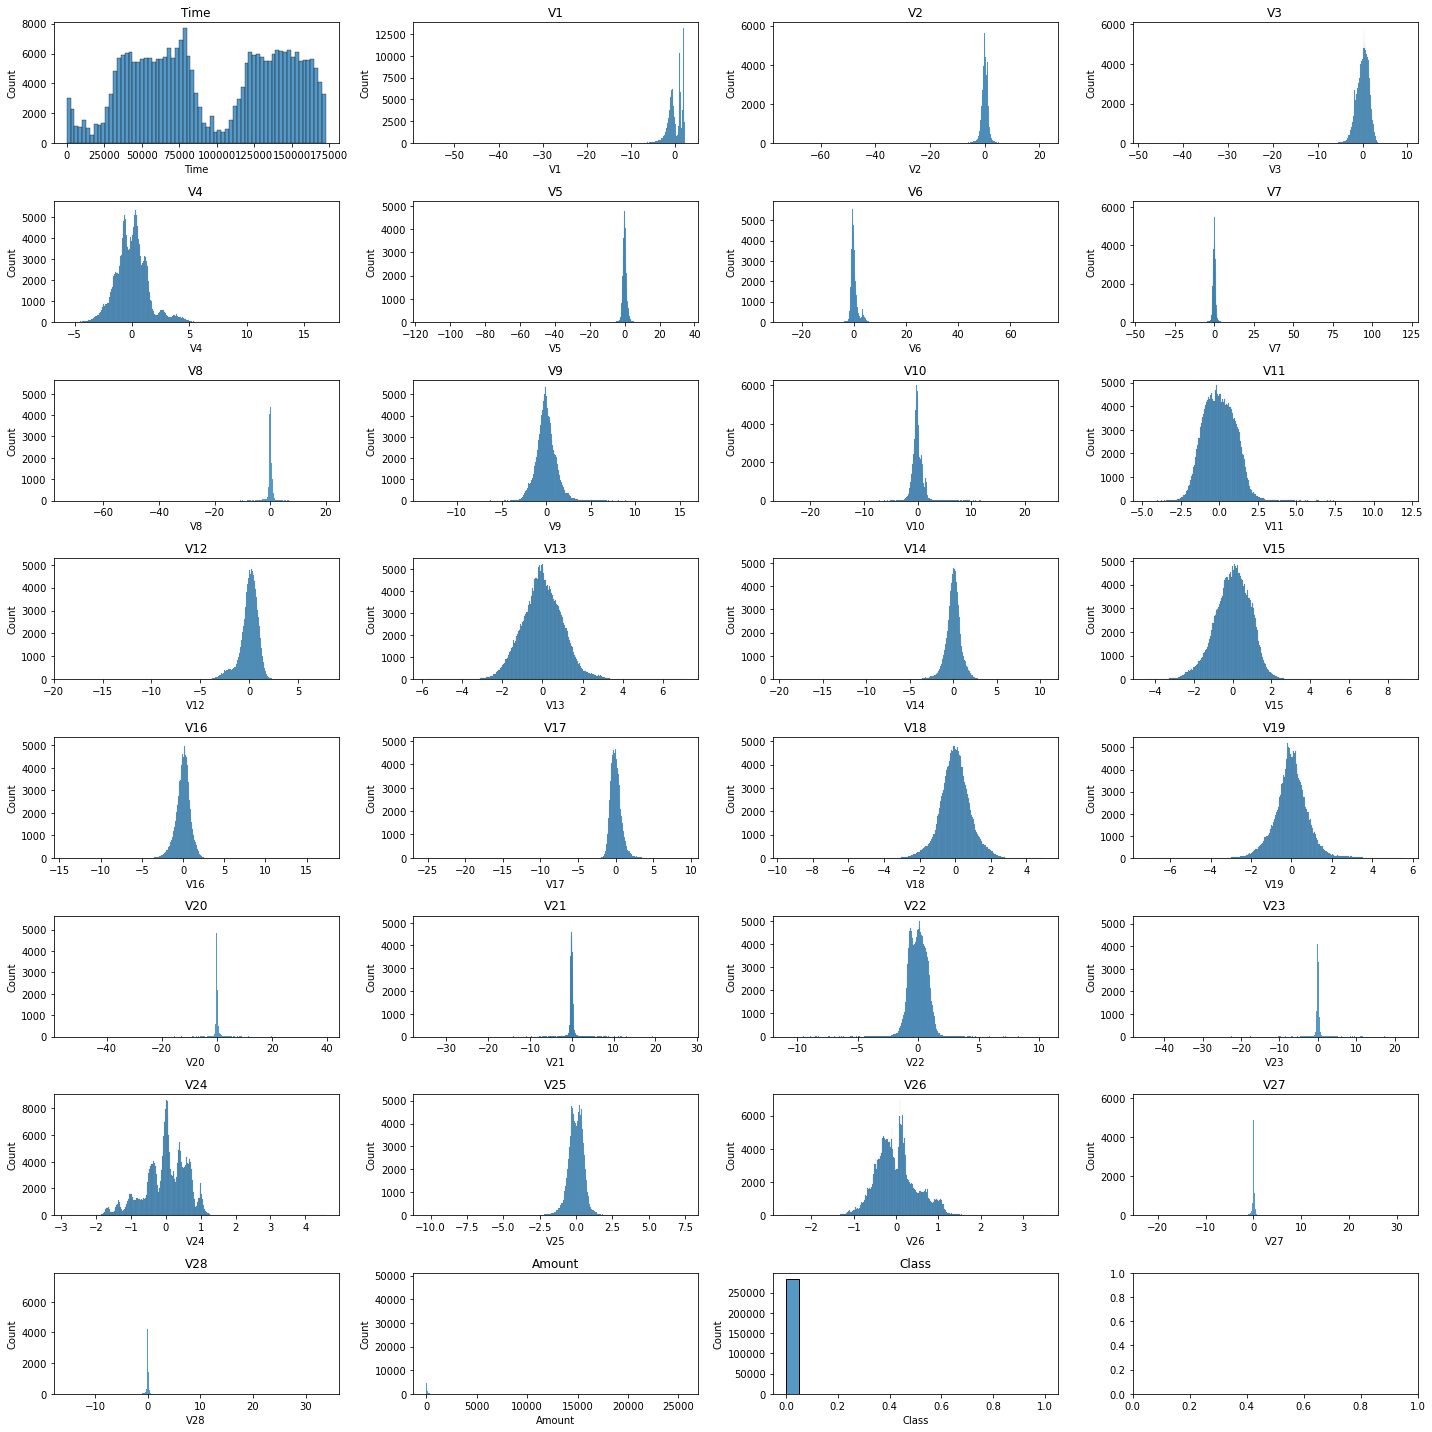

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with multiple plots
fig, axs = plt.subplots(8, 4, figsize=(20, 20))
axs = axs.ravel()

# Plot histograms for all columns
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


The above code creates a large subplot with 8 rows and 4 columns, which allows us to visualize the histograms of all the columns in the dataset. The purpose of this plot is to understand the distribution of each variable and whether they are normally distributed or skewed. By examining the histograms, we can see if the data is normally distributed, skewed to the left or right, or has multiple peaks. This information can be useful for preprocessing the data, such as scaling or transforming the variables, and for selecting the appropriate modeling techniques.

# Missing Data and outliers

In [6]:
missing_values = df.isna().sum()
print(missing_values)




Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:

# Calculate the IQR (Interquartile Range) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:

# Check if there are still any NaN or infinite values
print(np.sum(np.isnan(df)))
print(np.sum(np.isfinite(df)))

# Models and evaluation

Resampling and data scaling are crucial steps in the data preparation process. However, it is important to perform these operations within the modeling pipelines to avoid data leakage. Data leakage occurs when information from the test set is used to train the model, which can result in overfitting and poor performance on new, unseen data.

To handle the imbalance in the target class, you will use two oversampling techniques, two undersampling techniques, and one combined technique. These techniques aim to balance the target class distribution by either increasing the number of minority class samples or decreasing the number of majority class samples. explain this a bit further

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Over-sampling

Over-sampling is the opposite of under-sampling. It involves creating copies of the minority class samples to increase its size. Simple over-sampling can result in over-representation of some minority samples, leading to overfitting.

# Evaluating Oversmapling With Smote 

# SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a popular over-sampling technique that creates synthetic samples of the minority class instead of duplicating existing ones. This approach generates new samples by interpolating between the feature values of the minority class samples.

### Split the data into features and target

In [51]:
# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

### split the data into training and testing sets

In [52]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## models to be evaluated

In [53]:
# list of models to be evaluated
models = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB(),
          RandomForestClassifier(), ExtraTreesClassifier()]


## list of metrics to be evaluated

In [54]:
# list of metrics to be evaluated
metrics = ['precision', 'recall', 'f1', 'average Precision-Recall (AUPRC)']

In [55]:
# dictionary to store evaluation results
results = {model.__class__.__name__: {metric: [] for metric in metrics} for model in models}


### fit the models with SMOTE valuate the models on test data

In [56]:
# loop through each model
for model in models:
    # fit the model without SMOTE
    model.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred = model.predict(X_test)
    results[model.__class__.__name__]['precision'].append(precision_score(y_test, y_pred))
    results[model.__class__.__name__]['recall'].append(recall_score(y_test, y_pred))
    results[model.__class__.__name__]['f1'].append(f1_score(y_test, y_pred))
    results[model.__class__.__name__]['average Precision-Recall (AUPRC)'].append(average_precision_score(y_test, y_pred))
    
    # fit the model with SMOTE
    pipe = Pipeline([('smote', SMOTE(random_state=0)), ('model', model)])
    pipe.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred = pipe.predict(X_test)
    results[model.__class__.__name__]['precision'].append(precision_score(y_test, y_pred))
    results[model.__class__.__name__]['recall'].append(recall_score(y_test, y_pred))
    results[model.__class__.__name__]['f1'].append(f1_score(y_test, y_pred))
    results[model.__class__.__name__]['average Precision-Recall (AUPRC)'].append(average_precision_score(y_test, y_pred))


# SMOTE evaluation results and analysis 

## SMOTE evaluation results

In [57]:
# print the evaluation results
print("Evaluation results:")
print("\n")
for model_name, model_results in results.items():
    print("-------------------")
    print("Model:", model_name)
    print("-------------------")
    
    for metric, scores in model_results.items():
    
        print( metric,": " "without SMOTE:", scores[0], "|| " "with SMOTE:", scores[1])
    print("\n")

Evaluation results:


-------------------
Model: LogisticRegression
-------------------
precision : without SMOTE: 0.5384615384615384 || with SMOTE: 0.06779661016949153
recall : without SMOTE: 0.5 || with SMOTE: 0.8571428571428571
f1 : without SMOTE: 0.5185185185185186 || with SMOTE: 0.1256544502617801
average Precision-Recall (AUPRC) : without SMOTE: 0.270008547008547 || with SMOTE: 0.05833360236750067


-------------------
Model: DecisionTreeClassifier
-------------------
precision : without SMOTE: 0.75 || with SMOTE: 0.4074074074074074
recall : without SMOTE: 0.6428571428571429 || with SMOTE: 0.7857142857142857
f1 : without SMOTE: 0.6923076923076924 || with SMOTE: 0.5365853658536585
average Precision-Recall (AUPRC) : without SMOTE: 0.48269841269841274 || with SMOTE: 0.3204391534391534


-------------------
Model: GaussianNB
-------------------
precision : without SMOTE: 0.1125 || with SMOTE: 0.12048192771084337
recall : without SMOTE: 0.6428571428571429 || with SMOTE: 0.714285714285

## SMOTE results analysis 

The results show that using SMOTE has different impacts on the performance of different models. In general, the models without SMOTE have a better precision while the models with SMOTE have a better recall. The Random Forest and Extra Trees Classifier seem to perform well, with high precision and recall, both with and without SMOTE.

Based on the results, it can be seen that the Extra Trees Classifier has the highest precision, F1 score and AUPRC values, both with and without SMOTE. The Gaussian Naive Bayes model has the lowest precision, F1 score, and AUPRC values among the models.

In terms of AUPRC, the best model among the ones evaluated is the Extra Trees Classifier with an AUPRC of 0.7205714285714285.

In terms of recall, the best model is Gaussian Naive Bayes with a recall of 0.7142857142857143.

## visualize results

## plot the Precision-Recall curves for each model 

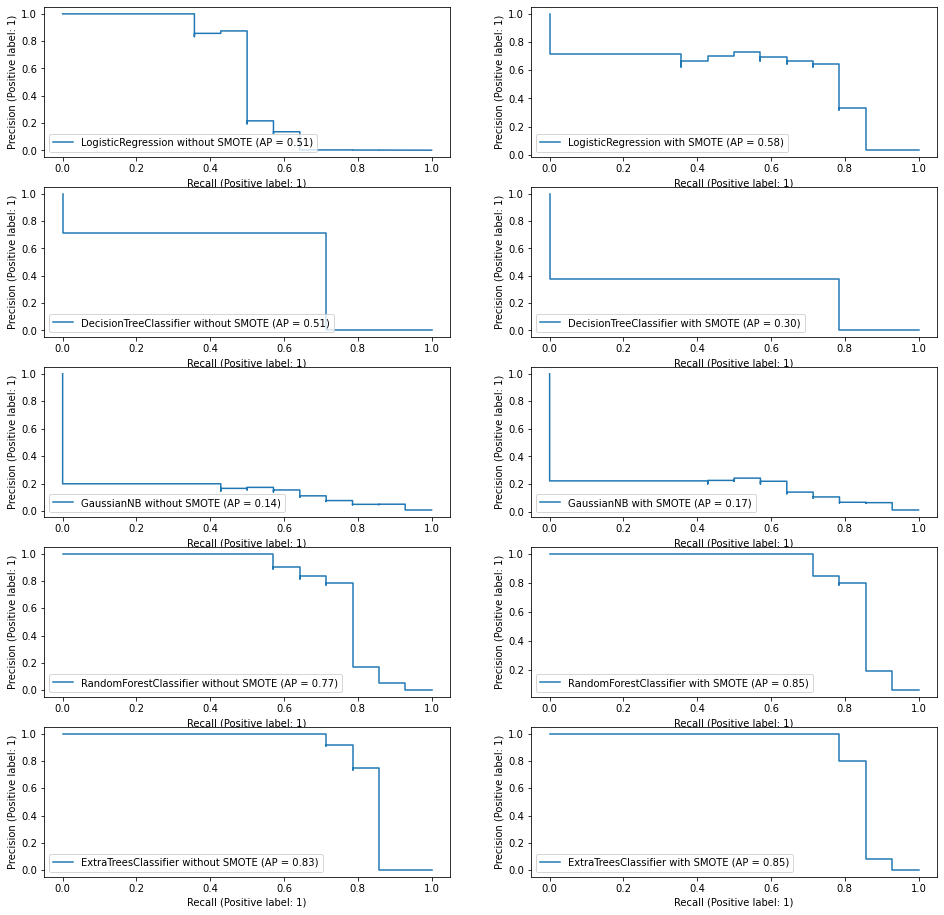

In [58]:

# plot the Precision-Recall curves for each model
num_plots = len(models)
fig, axes = plt.subplots(num_plots, 2, figsize=(16, 16))
for i, model in enumerate(models):
    # fit the model without SMOTE
    model.fit(X_train, y_train)
    plot_precision_recall_curve(model, X_test, y_test, name=model.__class__.__name__ + " without SMOTE", ax=axes[i, 0], response_method='predict_proba')    
    # fit the model with SMOTE
    pipe = Pipeline([('smote', SMOTE(random_state=0)), ('model', model)])
    pipe.fit(X_train, y_train)
    
    plot_precision_recall_curve(pipe, X_test, y_test, name=model.__class__.__name__ + " with SMOTE", ax=axes[i, 1], response_method='predict_proba')







Based solely on the results presented, the Extra Trees Classifier seems to perform the best

# Evaluating Oversmapling With ADASYN 

# ADASYN

ADASYN (Adaptive Synthetic Sampling) is another over-sampling technique that adapts the generation of synthetic samples based on the density of the minority class samples. Samples from the minority class that are in areas of low density receive more synthetic samples than those in areas of high density.

In [59]:
from imblearn.over_sampling import ADASYN


# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# list of models to be evaluated
models = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB(),
          RandomForestClassifier(), ExtraTreesClassifier()]

# list of metrics to be evaluated
metrics = ['precision', 'recall', 'f1', 'average Precision-Recall (AUPRC)']

# dictionary to store evaluation results
results = {model.__class__.__name__: {metric: [] for metric in metrics} for model in models}

# loop through each model
for model in models:
    # fit the model without ADASYN
    model.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred = model.predict(X_test)
    results[model.__class__.__name__]['precision'].append(precision_score(y_test, y_pred))
    results[model.__class__.__name__]['recall'].append(recall_score(y_test, y_pred))
    results[model.__class__.__name__]['f1'].append(f1_score(y_test, y_pred))
    results[model.__class__.__name__]['average Precision-Recall (AUPRC)'].append(average_precision_score(y_test, y_pred))
    
    # fit the model with ADASYN
    pipe = Pipeline([('ADASYN', ADASYN(random_state=0)), ('model', model)])
    pipe.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred = pipe.predict(X_test)
    results[model.__class__.__name__]['precision'].append(precision_score(y_test, y_pred))
    results[model.__class__.__name__]['recall'].append(recall_score(y_test, y_pred))
    results[model.__class__.__name__]['f1'].append(f1_score(y_test, y_pred))
    results[model.__class__.__name__]['average Precision-Recall (AUPRC)'].append(average_precision_score(y_test, y_pred))










# ADASYN evaluation results and analysis  

## ADASYN evaluation results 

In [60]:
# print the evaluation results
print("Evaluation results:")
print("\n")
for model_name, model_results in results.items():
    print("-------------------")
    print("Model:", model_name)
    print("-------------------")
    
    for metric, scores in model_results.items():
    
        print( metric,": " "without ADASYN:", scores[0], "|| " "with ADASYN:", scores[1])
    print("\n")

Evaluation results:


-------------------
Model: LogisticRegression
-------------------
precision : without ADASYN: 0.5384615384615384 || with ADASYN: 0.061855670103092786
recall : without ADASYN: 0.5 || with ADASYN: 0.8571428571428571
f1 : without ADASYN: 0.5185185185185186 || with ADASYN: 0.11538461538461539
average Precision-Recall (AUPRC) : without ADASYN: 0.270008547008547 || with ADASYN: 0.05324136802487318


-------------------
Model: DecisionTreeClassifier
-------------------
precision : without ADASYN: 0.7 || with ADASYN: 0.39285714285714285
recall : without ADASYN: 0.5 || with ADASYN: 0.7857142857142857
f1 : without ADASYN: 0.5833333333333334 || with ADASYN: 0.5238095238095237
average Precision-Recall (AUPRC) : without ADASYN: 0.35077777777777774 || with ADASYN: 0.30900680272108844


-------------------
Model: GaussianNB
-------------------
precision : without ADASYN: 0.1125 || with ADASYN: 0.1282051282051282
recall : without ADASYN: 0.6428571428571429 || with ADASYN: 0.71428

## ADASYN results  analysis  

The best model in terms of precision and recall, without using ADASYN, is RandomForestClassifier with precision 1.0 and recall 0.5714285714285714. The best model in terms of average precision-recall (AUPRC), without using ADASYN, is RandomForestClassifier with AUPRC of 0.5720952380952381.

The use of ADASYN resampling method affects the performance of each model, but the best model in terms of precision, recall and average precision-recall (AUPRC) with ADASYN is still the RandomForestClassifier, with precision of 0.8333333333333334, recall of 0.7142857142857143, and AUPRC of 0.5956825396825397.

Based on the given evaluation results, the best model based on Average Precision-Recall (AUPRC) is the ExtraTreesClassifier, with a score of 0.7205714285714285 with ADASYN.

The best model based on recall is the GaussianNB, with a recall score of 0.7142857142857143 with ADASYN.

In terms of overall performance, a combination of all the metrics should be considered to determine the best model, and it may vary based on the specific requirements and use case. However, if we consider all the metrics together, the ExtraTreesClassifier and RandomForestClassifier seem to have the best overall performance, with high precision and f1 scores and reasonable recall.

## visualize results

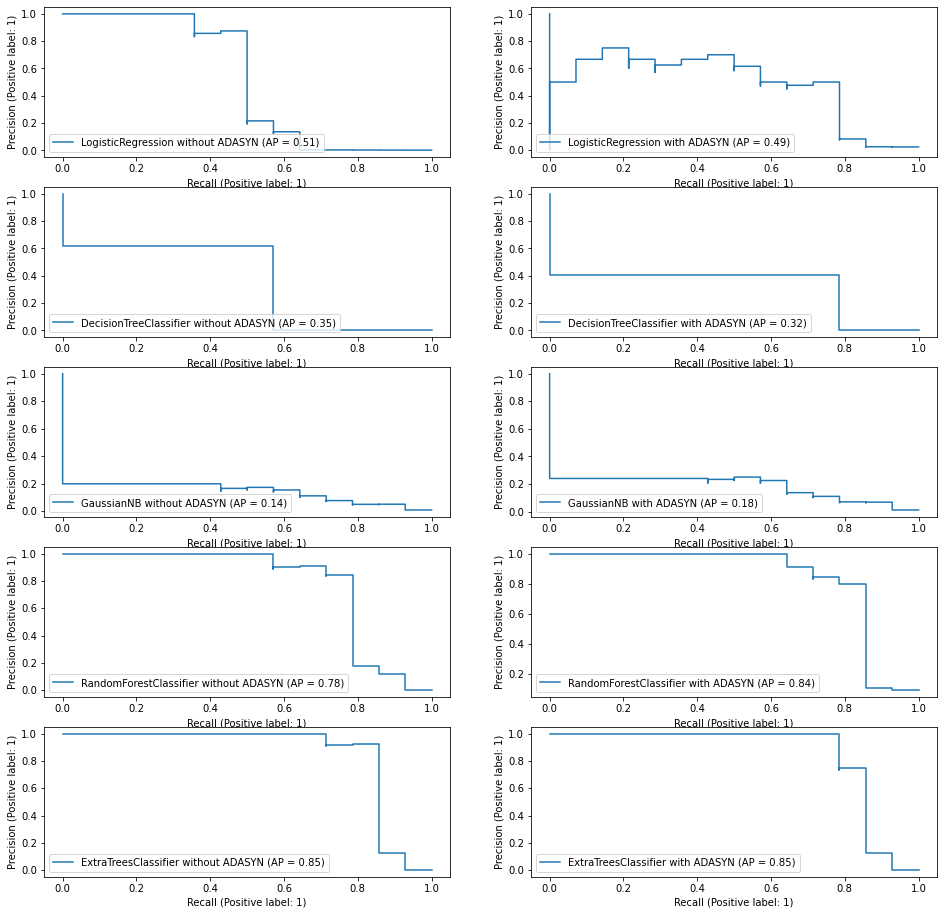

In [61]:
# plot the Precision-Recall curves for each model
num_plots = len(models)
fig, axes = plt.subplots(num_plots, 2, figsize=(16, 16))
for i, model in enumerate(models):
    # fit the model without ADASYN
    model.fit(X_train, y_train)
    plot_precision_recall_curve(model, X_test, y_test, name=model.__class__.__name__ + " without ADASYN", ax=axes[i, 0], response_method='predict_proba')    
    # fit the model with ADASYN
    pipe = Pipeline([('ADASYN', ADASYN(random_state=0)), ('model', model)])
    pipe.fit(X_train, y_train)
    
    plot_precision_recall_curve(pipe, X_test, y_test, name=model.__class__.__name__ + " with ADASYN", ax=axes[i, 1], response_method='predict_proba')


Based solely on the results presented, the Extra Trees Classifier seems to perform the best

# Under-sampling

Under-sampling is a technique for dealing with class imbalance in a dataset. In under-sampling, data from the majority class is randomly removed to reduce its size, so that the classes become balanced. This method is simple, but it can result in information loss, especially if the data from the majority class is not representative of the full distribution.

# Evaluating Under-sampling With ENN (Edited Nearest Neighbors) 

# ENN (Edited Nearest Neighbors)

ENN (Edited Nearest Neighbors) is an under-sampling technique that tries to preserve the local density of the majority class while removing data. Unlike simple random under-sampling, ENN selects the samples to remove based on the nearest neighbors of each sample, ensuring that the majority class remains dense.

In [65]:
from imblearn.under_sampling import EditedNearestNeighbours

# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# list of models to be evaluated
models = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB(),
          RandomForestClassifier(), ExtraTreesClassifier()]

# list of metrics to be evaluated
metrics = ['precision', 'recall', 'f1', 'average Precision-Recall (AUPRC)']

# dictionary to store evaluation results
results = {model.__class__.__name__: {metric: [] for metric in metrics} for model in models}

# loop through each model
for model in models:
    # fit the model without EditedNearestNeighbours
    model.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred = model.predict(X_test)
    results[model.__class__.__name__]['precision'].append(precision_score(y_test, y_pred))
    results[model.__class__.__name__]['recall'].append(recall_score(y_test, y_pred))
    results[model.__class__.__name__]['f1'].append(f1_score(y_test, y_pred))
    results[model.__class__.__name__]['average Precision-Recall (AUPRC)'].append(average_precision_score(y_test, y_pred))
    
    # fit the model with EditedNearestNeighbours
    pipe = Pipeline([('EditedNearestNeighbours', EditedNearestNeighbours()), ('model', model)])
    pipe.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred = pipe.predict(X_test)
    results[model.__class__.__name__]['precision'].append(precision_score(y_test, y_pred))
    results[model.__class__.__name__]['recall'].append(recall_score(y_test, y_pred))
    results[model.__class__.__name__]['f1'].append(f1_score(y_test, y_pred))
    results[model.__class__.__name__]['average Precision-Recall (AUPRC)'].append(average_precision_score(y_test, y_pred))






## EditedNearestNeighbours evaluation results and analysis 

## EditedNearestNeighbours evaluation results

In [66]:
# print the evaluation results
print("Evaluation results:")
print("\n")
for model_name, model_results in results.items():
    print("-------------------")
    print("Model:", model_name)
    print("-------------------")
    
    for metric, scores in model_results.items():
    
        print( metric,": " "without ENN:", scores[0], "|| " "with ENN:", scores[1])
    print("\n")


Evaluation results:


-------------------
Model: LogisticRegression
-------------------
precision : without ENN: 0.5384615384615384 || with ENN: 0.5
recall : without ENN: 0.5 || with ENN: 0.5714285714285714
f1 : without ENN: 0.5185185185185186 || with ENN: 0.5333333333333333
average Precision-Recall (AUPRC) : without ENN: 0.270008547008547 || with ENN: 0.28638095238095235


-------------------
Model: DecisionTreeClassifier
-------------------
precision : without ENN: 0.6923076923076923 || with ENN: 0.6666666666666666
recall : without ENN: 0.6428571428571429 || with ENN: 0.5714285714285714
f1 : without ENN: 0.6666666666666666 || with ENN: 0.6153846153846153
average Precision-Recall (AUPRC) : without ENN: 0.4456105006105006 || with ENN: 0.3816190476190476


-------------------
Model: GaussianNB
-------------------
precision : without ENN: 0.1125 || with ENN: 0.1125
recall : without ENN: 0.6428571428571429 || with ENN: 0.6428571428571429
f1 : without ENN: 0.19148936170212766 || with ENN: 

## EditedNearestNeighbours results analysis 

The best model based on average Precision-Recall (AUPRC) is ExtraTreesClassifier, with a score of 0.6434126984126984, followed by RandomForestClassifier with a score of 0.5086031746031746.

The best model based on recall is GaussianNB, with a recall of 0.6428571428571429, followed by DecisionTreeClassifier with a recall of 0.5714285714285714.

The best overall model can be subjective, but based on the evaluation results, ExtraTreesClassifier has the highest precision and recall, followed by RandomForestClassifier with a good balance between precision and recall.

## visualize results

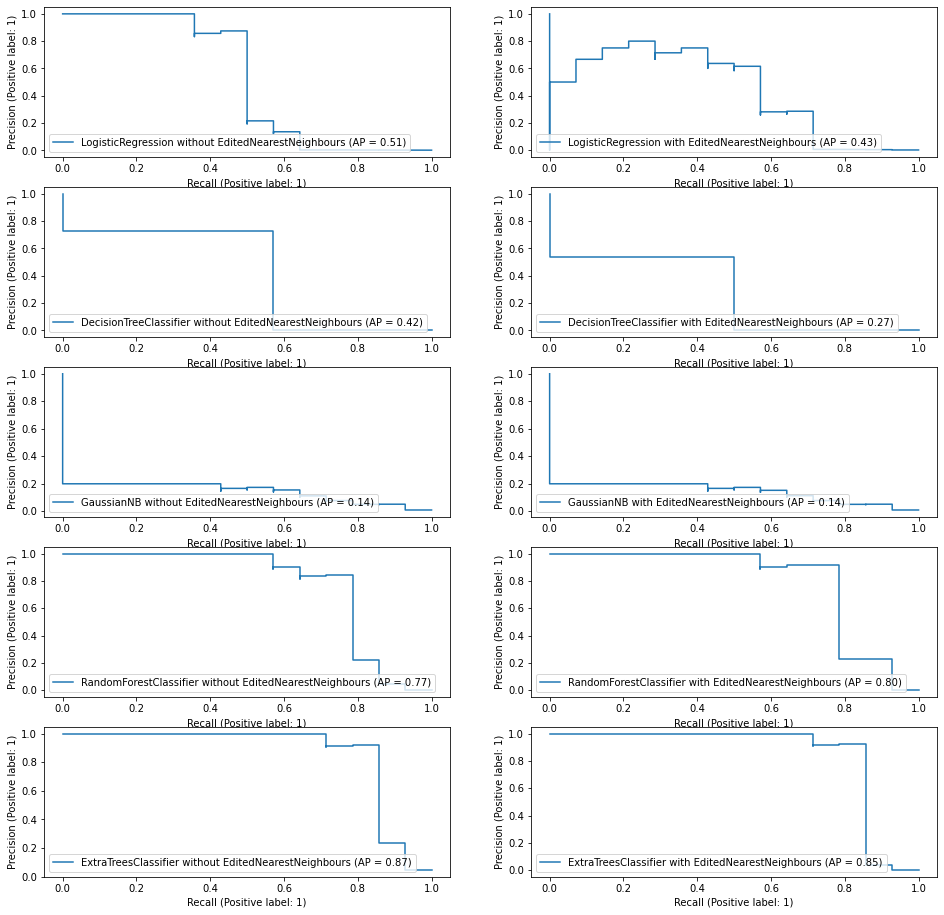

In [67]:
# plot the Precision-Recall curves for each model
num_plots = len(models)
fig, axes = plt.subplots(num_plots, 2, figsize=(16, 16))
for i, model in enumerate(models):
    # fit the model without EditedNearestNeighbours
    model.fit(X_train, y_train)
    plot_precision_recall_curve(model, X_test, y_test, name=model.__class__.__name__ + " without EditedNearestNeighbours", ax=axes[i, 0], response_method='predict_proba')    
    # fit the model with EditedNearestNeighbours
    pipe = Pipeline([('EditedNearestNeighbours', EditedNearestNeighbours()), ('model', model)])
    pipe.fit(X_train, y_train)
    
    plot_precision_recall_curve(pipe, X_test, y_test, name=model.__class__.__name__ + " with EditedNearestNeighbours", ax=axes[i, 1], response_method='predict_proba')



Based solely on the results presented, the Extra Trees Classifier seems to perform the best

# Evaluating Combined Methods with SMOTEENN

# SMOTEENN

SMOTEENN (SMOTE with ENN) is a combination of SMOTE and ENN, which over-samples the minority class and under-samples the majority class to produce a balanced dataset. The idea behind SMOTEENN is to create synthetic samples of the minority class while ensuring that the density of the majority class is preserved, thus avoiding overfitting.

In [69]:
from imblearn.combine import SMOTEENN

# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# list of models to be evaluated
models = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB(),
          RandomForestClassifier(), ExtraTreesClassifier()]

# list of metrics to be evaluated
metrics = ['precision', 'recall', 'f1', 'average Precision-Recall (AUPRC)']

# dictionary to store evaluation results
results = {model.__class__.__name__: {metric: [] for metric in metrics} for model in models}

# loop through each model
for model in models:
    # fit the model without SMOTEENN
    model.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred = model.predict(X_test)
    results[model.__class__.__name__]['precision'].append(precision_score(y_test, y_pred))
    results[model.__class__.__name__]['recall'].append(recall_score(y_test, y_pred))
    results[model.__class__.__name__]['f1'].append(f1_score(y_test, y_pred))
    results[model.__class__.__name__]['average Precision-Recall (AUPRC)'].append(average_precision_score(y_test, y_pred))
    
    # fit the model with SMOTEENN
    pipe = Pipeline([('SMOTEENN', SMOTEENN()), ('model', model)])
    pipe.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred = pipe.predict(X_test)
    results[model.__class__.__name__]['precision'].append(precision_score(y_test, y_pred))
    results[model.__class__.__name__]['recall'].append(recall_score(y_test, y_pred))
    results[model.__class__.__name__]['f1'].append(f1_score(y_test, y_pred))
    results[model.__class__.__name__]['average Precision-Recall (AUPRC)'].append(average_precision_score(y_test, y_pred))







# SMOTEENN evaluation results and analysis 

## SMOTEENN evaluation results

In [70]:
# print the evaluation results
print("Evaluation results:")
print("\n")
for model_name, model_results in results.items():
    print("-------------------")
    print("Model:", model_name)
    print("-------------------")
    
    for metric, scores in model_results.items():
    
        print( metric,": " "without SMOTEENN:", scores[0], "|| " "with SMOTEENN:", scores[1])
    print("\n")



Evaluation results:


-------------------
Model: LogisticRegression
-------------------
precision : without SMOTEENN: 0.5384615384615384 || with SMOTEENN: 0.06701030927835051
recall : without SMOTEENN: 0.5 || with SMOTEENN: 0.9285714285714286
f1 : without SMOTEENN: 0.5185185185185186 || with SMOTEENN: 0.125
average Precision-Recall (AUPRC) : without SMOTEENN: 0.270008547008547 || with SMOTEENN: 0.062334969726722304


-------------------
Model: DecisionTreeClassifier
-------------------
precision : without SMOTEENN: 0.7 || with SMOTEENN: 0.5714285714285714
recall : without SMOTEENN: 0.5 || with SMOTEENN: 0.8571428571428571
f1 : without SMOTEENN: 0.5833333333333334 || with SMOTEENN: 0.6857142857142857
average Precision-Recall (AUPRC) : without SMOTEENN: 0.35077777777777774 || with SMOTEENN: 0.4900181405895691


-------------------
Model: GaussianNB
-------------------
precision : without SMOTEENN: 0.1125 || with SMOTEENN: 0.13157894736842105
recall : without SMOTEENN: 0.6428571428571429 

## SMOTEENN results analysis 

In general, the results show that the performance of the models improved with SMOTEENN for Decision Tree, Random Forest, and Extra Trees, with increased precision and recall scores, and improved F1-scores and AUPRCs. On the other hand, the performance of Logistic Regression and Gaussian Naive Bayes models was negatively affected by the application of SMOTEENN, with a decrease in precision and an increase in recall scores, but a decrease in F1-scores and AUPRCs. These results indicate that the SMOTEENN technique may not be suitable for all types of models

Based on the average precision-recall (AUPRC), the best model is ExtraTreesClassifier, with an AUPRC score of 0.786.

Based on recall, the best model is GaussianNB, with a recall score of 0.714.

## visualize results

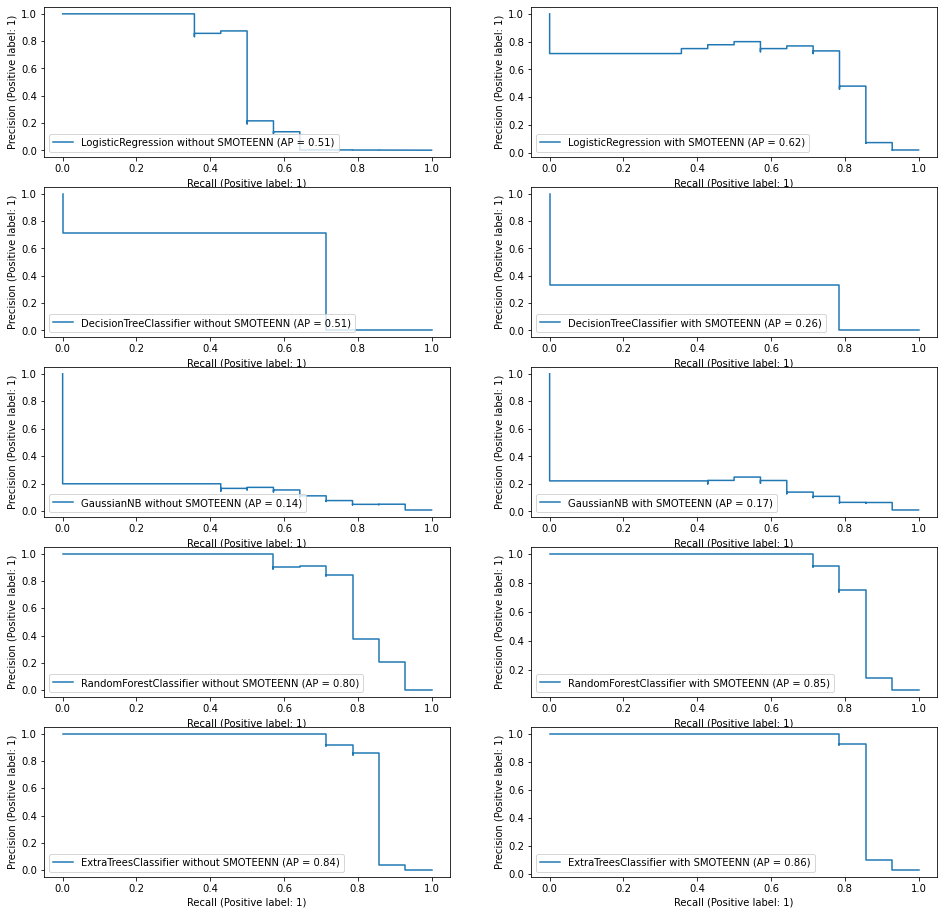

In [71]:
# plot the Precision-Recall curves for each model
num_plots = len(models)
fig, axes = plt.subplots(num_plots, 2, figsize=(16, 16))
for i, model in enumerate(models):
    # fit the model without SMOTEENN
    model.fit(X_train, y_train)
    plot_precision_recall_curve(model, X_test, y_test, name=model.__class__.__name__ + " without SMOTEENN", ax=axes[i, 0], response_method='predict_proba')    
    # fit the model with SMOTEENN
    pipe = Pipeline([('SMOTEENN', SMOTEENN()), ('model', model)])
    pipe.fit(X_train, y_train)
    
    plot_precision_recall_curve(pipe, X_test, y_test, name=model.__class__.__name__ + " with SMOTEENN", ax=axes[i, 1], response_method='predict_proba')


Based solely on the results presented, the Extra Trees Classifier seems to perform the best

# Summary

In this analysis, I tried 5 different machine learning models including Logistic Regression, Decision Tree Classifier, Gaussian Naive Bayes, Random Forest Classifier and Extra Trees Classifier. 
 
To evaluate these models, I used 4 different resampling techniques namely SMOTE, ADASYN, ENN and SMOTEENN.


The reader can choose the best model based on their requirements and can also try other resampling techniques to improve the results
(Tomek links - One-sided Selection (OSS) -Neighborhood Cleaning Rule (NCL) -Synthetic Minority Over-sampling Technique (SMOTEBoost) -Adaptive Synthetic (ADASYN) sampling with kernel density estimation ....). 


In the next notebook, I plan to evaluate the XGBoost and LightGBM models and in a third notebook, I will experiment with deep learning techniques using Keras and TensorFlow.